In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

import sys
sys.path.insert(0, "/Users/lili/dropbox_lili/outliers_package/blackSheep/")
import blacksheep as blsh

# Reading in data

In [2]:
values = pd.read_csv('brca/phospho_common_samples_data.csv', index_col=0)
values.head()

,TCGA-AO-A12D,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AN-A04A,TCGA-BH-A0AV,TCGA-C8-A12T,...,TCGA-BH-A0DD,TCGA-BH-A0E9,TCGA-AR-A0TT,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX
index,,,,,,,,,,,,,,,,,,,,,
NP_001611-S1007s,-0.919089,-0.086607,-2.700983,1.301494,2.952304,-0.663642,-2.718940,-0.194798,-0.262126,-0.457748,...,-0.196892,0.699656,2.543093,0.805357,4.389396,1.338505,3.450978,0.200324,1.728556,1.092898
NP_001611-S1010s,-1.271514,-0.315189,-2.208631,1.820337,3.049420,-0.371558,4.472473,-0.787656,1.760293,2.286200,...,-0.406607,1.131644,-0.097738,-0.124880,0.070029,0.495032,0.776968,1.017243,2.213385,0.444430
NP_001611-S1023s,NaN,NaN,NaN,-0.302638,3.157830,0.528494,2.208079,NaN,NaN,NaN,...,-0.927123,1.701867,1.417613,0.880172,0.812259,0.364182,1.626879,1.985442,-0.342381,1.767384
NP_001611-S1042s,-2.298519,0.819633,-0.419166,1.570435,0.883498,0.043851,0.214017,0.902432,1.842090,0.637370,...,0.699301,2.047456,-0.127163,-0.795385,0.797827,1.628386,1.382329,NaN,NaN,NaN
NP_001611-S1068s,-0.802335,-1.585542,-1.411369,1.394314,2.412517,-0.847546,0.042516,0.189233,0.089599,1.215691,...,-2.398147,0.939409,0.377955,-0.915370,2.065803,3.490470,2.797509,0.485597,2.001793,-0.352144


In [3]:
annotations = pd.read_csv('brca/annotations_common_samples.csv', index_col=0)
annotations.head()

,Sample ID,Biospecimen Barcode Side,UIUD,PAM50,ER Status,PR Status,HER2 Status,QC Status,Proteome Cluster (see Fig. 3b),Phosphoproteome Cluster (see Fig. 3b),...,iTRAQReporterIon,CommonControl,GATA3 Mutation,PIK3CA Mutation,TP53 Mutation,PIK3CA missense mutation in helical domain all tumors,PIK3CA missense mutation in kinase domain all tumors,TP53 Nonsense/Frameshift all tumors,TP53 Missense mutation all tumors,TP53 missense mutations in DNA binding domain all tumors
TCGA-AO-A12D,AO-A12D,TCGA-AO-A12D-01A-41-A21V-30,1DC52613-0C9C-4107-A800-6CF8A5DBC1D7,Her2,Negative,Negative,Positive,pass,1.0,1.0,...,114,YES,NaN,NaN,Frame_Shift_Del|Somatic|p.C242fs,0.0,0.0,1.0,NaN,NaN
TCGA-BH-A18Q,BH-A18Q,TCGA-BH-A18Q-01A-41-A21W-30,5188E257-2542-42DE-AB8F-D1011AA35509,Basal,Negative,Negative,Negative,pass,1.0,3.0,...,115,NO,NaN,NaN,Frame_Shift_Ins|Somatic|p.P76fs,0.0,0.0,1.0,NaN,NaN
TCGA-C8-A130,C8-A130,TCGA-C8-A130-01A-41-A21V-30,28E062F4-E9E6-468B-BF72-BA973B111CCB,Her2,Positive,Positive,Equivocal,pass,2.0,1.0,...,116,YES,NaN,Missense_Mutation|Somatic|p.H1047R,Frame_Shift_Del|Somatic|p.N131fs,NaN,1.0,1.0,NaN,NaN
TCGA-C8-A138,C8-A138,TCGA-C8-A138-01A-14-A21W-30,035ADBBA-464A-4569-9E07-8B6A6BD12407,Her2,Positive,Negative,Positive,pass,2.0,2.0,...,114,YES,NaN,NaN,Frame_Shift_Del|Somatic|p.L308fs,0.0,0.0,1.0,NaN,NaN
TCGA-E2-A154,E2-A154,TCGA-E2-A154-01A-41-A21V-30,7DC5DC2F-EE63-4A02-BF6D-950B8A913082,LumA,Positive,Positive,Negative,pass,3.0,3.0,...,115,NO,NaN,Missense_Mutation|Somatic|p.H1047L,NaN,NaN,1.0,0.0,0.0,0.0


# Isolating which samples annotations for which I want to perform comparisons

In [4]:
for col in ['GATA3 Mutation','PIK3CA Mutation','TP53 Mutation']:
    new_col = '.'.join(col.split()+['Status'])
    annotations[new_col] = annotations[col].isnull()==False

annotations = blsh.binarize_annotations(annotations[[
    'PAM50', 
    'ER Status', 
    'PR Status', 
    'GATA3.Mutation.Status',
    'PIK3CA.Mutation.Status',
    'TP53.Mutation.Status'
]])

# Performing differential outlier analysis for each annotation column

In [5]:
directions = ['up', 'down']

In [7]:
results = {}
for updown in directions:
    results[updown] = blsh.run_outliers(values, annotations,
                                        up_or_down=updown, 
                                        output_comparison_summaries=True, 
                                        output_prefix="output/brca",
                                       )

In [16]:
for updown in directions:
    results[updown][0].df.to_csv('output/brca_outlier_agg_table_%s.csv'%updown)
    results[updown][0].frac_table.to_csv('output/brca_outlier_frac_table_%s.csv'%updown)

In [6]:
no_agg_results = {}
for updown in directions:
    no_agg_results[updown] = blsh.run_outliers(values, annotations,aggregate=False,
                                        up_or_down=updown, 
                                        output_comparison_summaries=True, 
                                        output_prefix="output/brca_no_agg",
                                       )

/Users/lili/anaconda3/envs/blacksheep/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
08/06/2019 14:20:51:WARNING:No rows tested for fisherFDR_PAM50_LumA_not-LumA
08/06/2019 14:20:52:WARNING:No rows tested for fisherFDR_PAM50_LumB_not-LumB
08/06/2019 14:20:52:WARNING:No rows tested for fisherFDR_PAM50_Basal_not-Basal
08/06/2019 14:20:52:WARNING:No rows tested for fisherFDR_PAM50_Her2_not-Her2
08/06/2019 14:20:52:WARNING:No rows tested for fisherFDR_ER Status_Positive
08/06/2019 14:20:52:WARNING:No rows tested for fisherFDR_PR Status_Positive
08/06/2019 14:20:53:WARNING:No rows tested for fisherFDR_GATA3.Mutation.Status_False
08/06/2019 14:20:53:WARNING:No rows tested for fisherFDR_PIK3CA.Mutation.Status_False
08/06/2019 14:20:53:WARNING:No rows tested for fisherFDR_PIK3CA.Mutation.Status_True
08/06/2019 14:20:53:WARNING:No rows tested for fisherFDR_TP53.Mutation.Status_True
08/06/2019 14:20:53:WARNI

In [9]:
for updown in directions:
    no_agg_results[updown][0].df.to_csv('output/no_agg/brca_outlier_no_agg_table_%s.csv'%updown)
    no_agg_results[updown][0].frac_table.to_csv('output/no_agg/brca_frac_table_%s.csv'%updown)
    no_agg_results[updown][1].df.to_csv('output/no_agg/brca_qvalues_no_agg_%s.csv'%updown)

# Accumulating all results into 1 table, and saving it

In [10]:
up_qs = results['up'][1].df
down_qs = results['down'][1].df

In [11]:
up_qs.columns = [col+'_up' for col in up_qs.columns]
down_qs.columns = [col+'_down' for col in down_qs.columns]

In [12]:
qvalues = pd.concat([up_qs, down_qs], axis=1, join='outer', sort=True)

In [13]:
qvalues.shape

(1472, 36)

In [14]:
qvalues.to_csv('output/brca_phospho_qvalues.csv')

# Making heatmaps

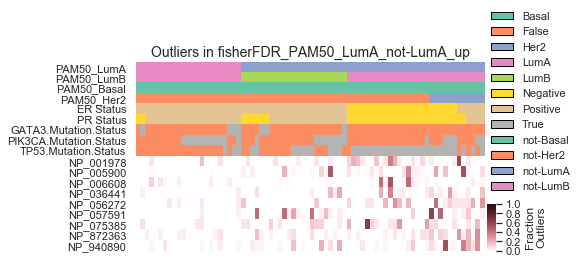

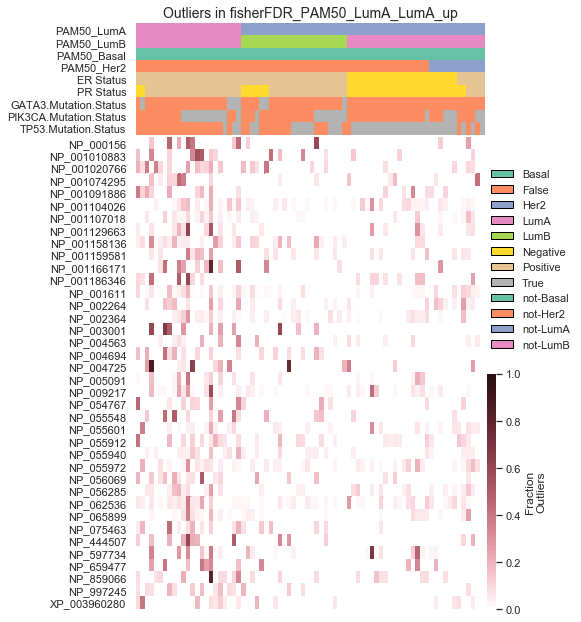

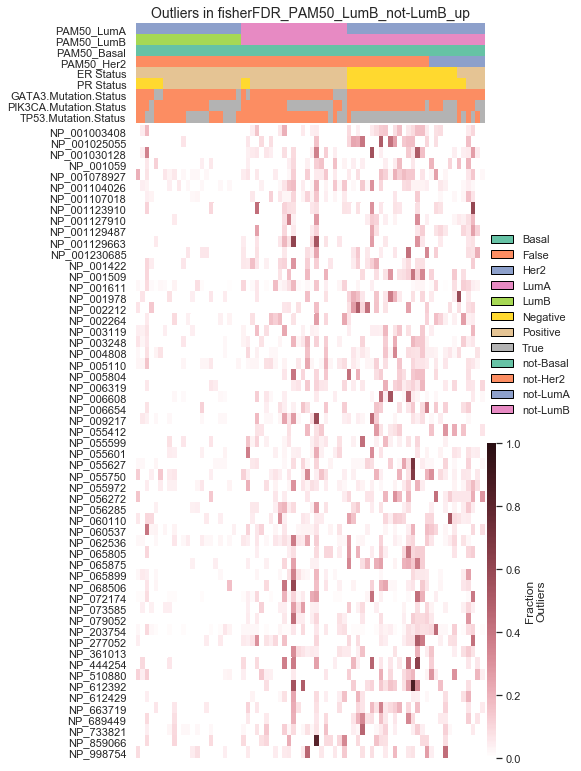

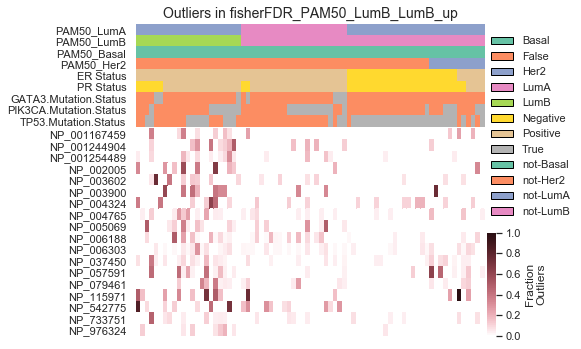

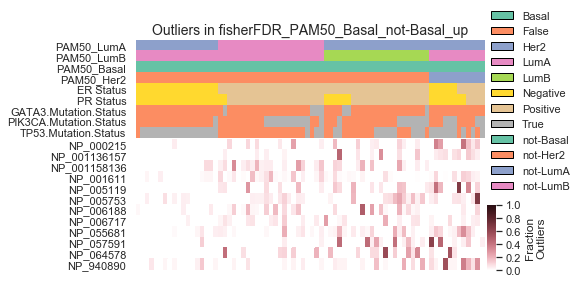

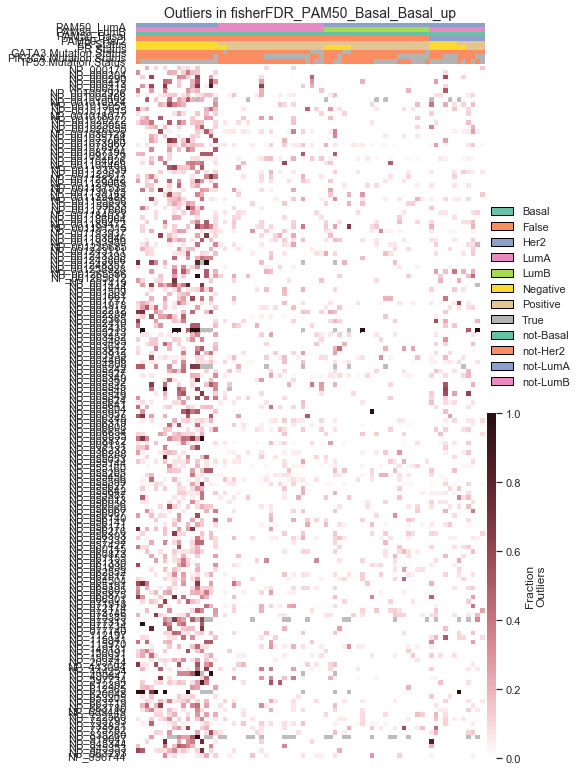

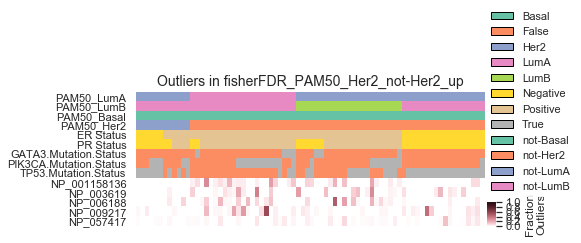

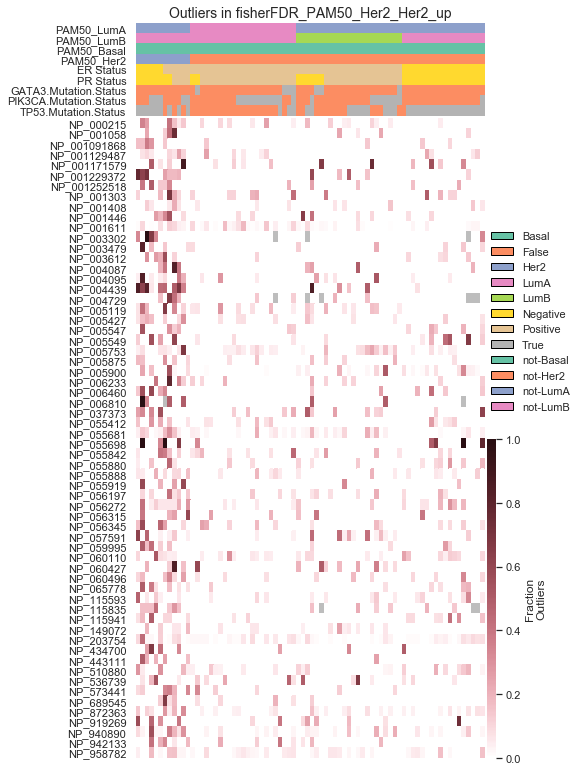

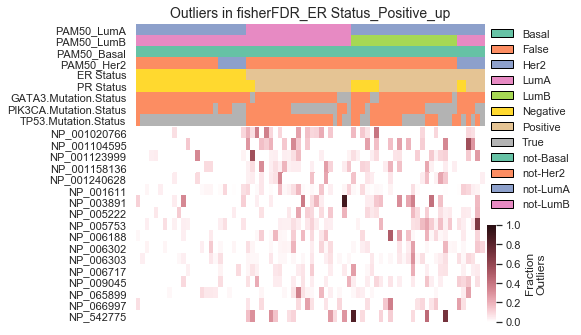

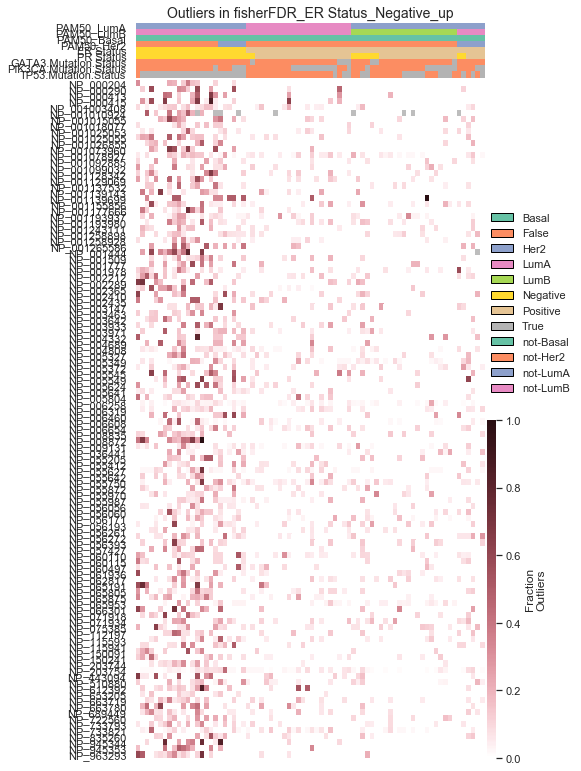

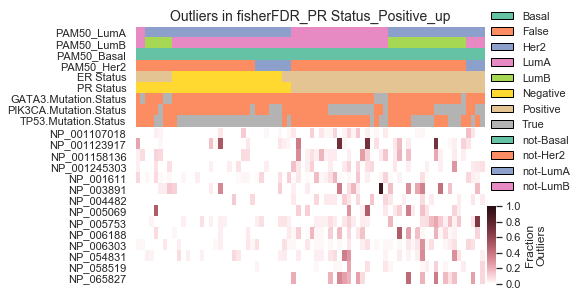

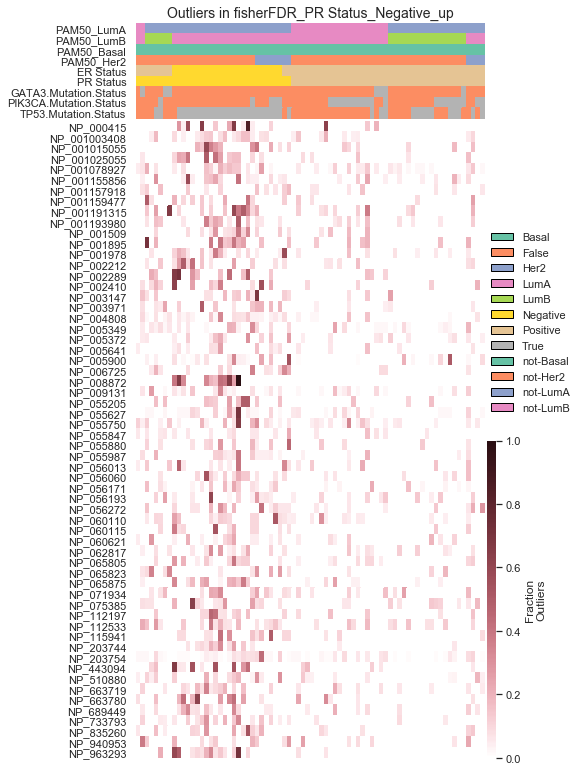

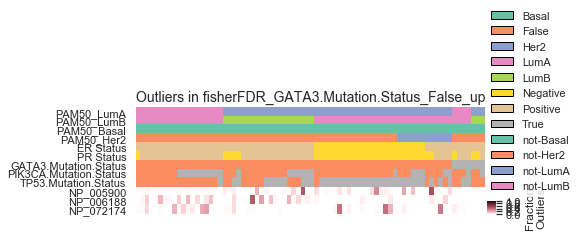

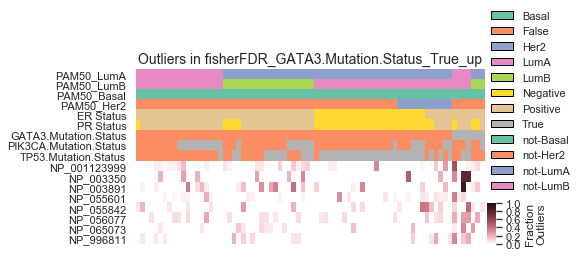

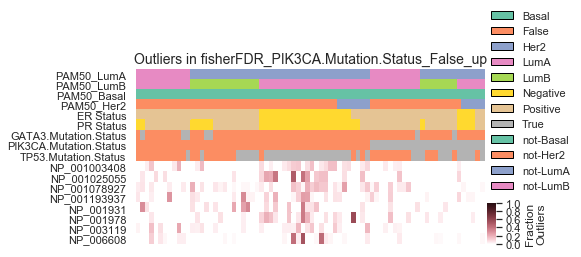

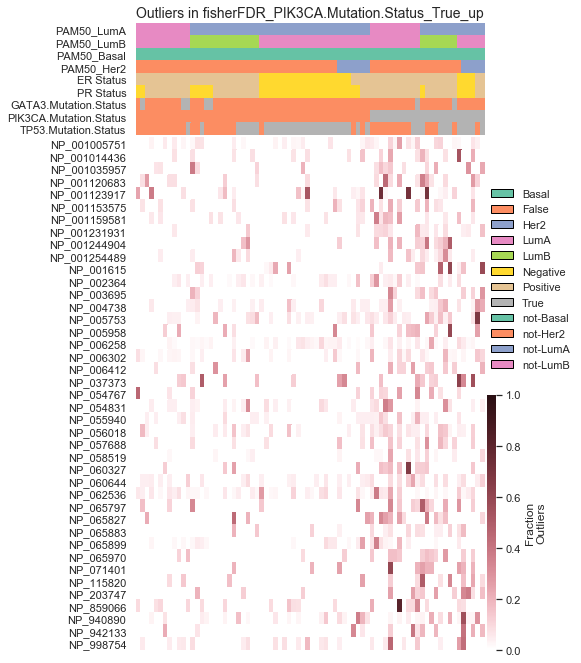

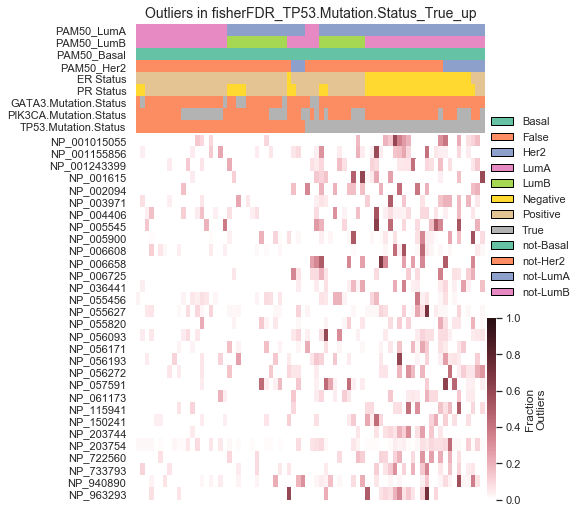

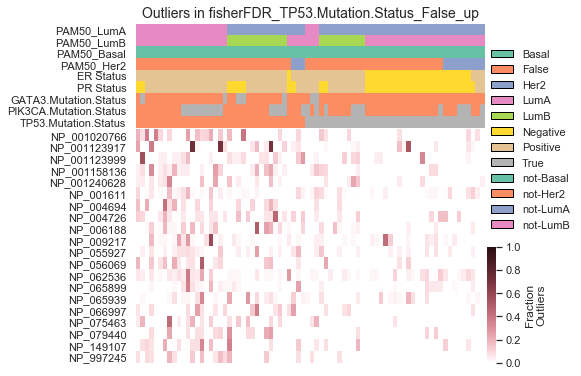

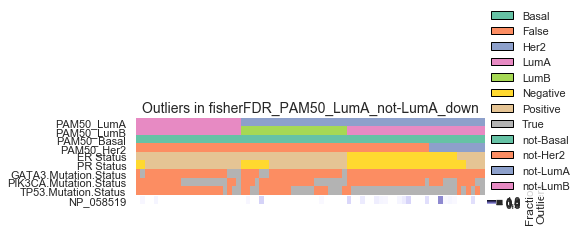

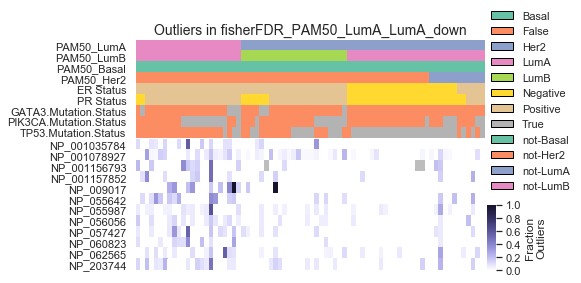

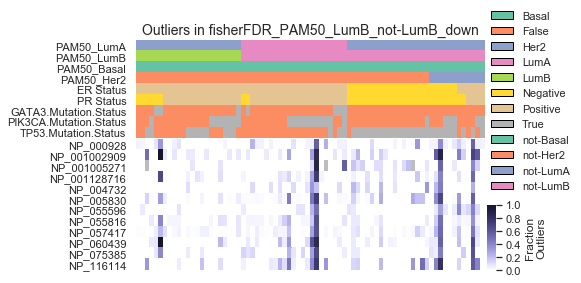

08/06/2019 14:49:24:WARNING:No significant genes at FDR 0.01 in fisherFDR_PAM50_LumB_LumB_down


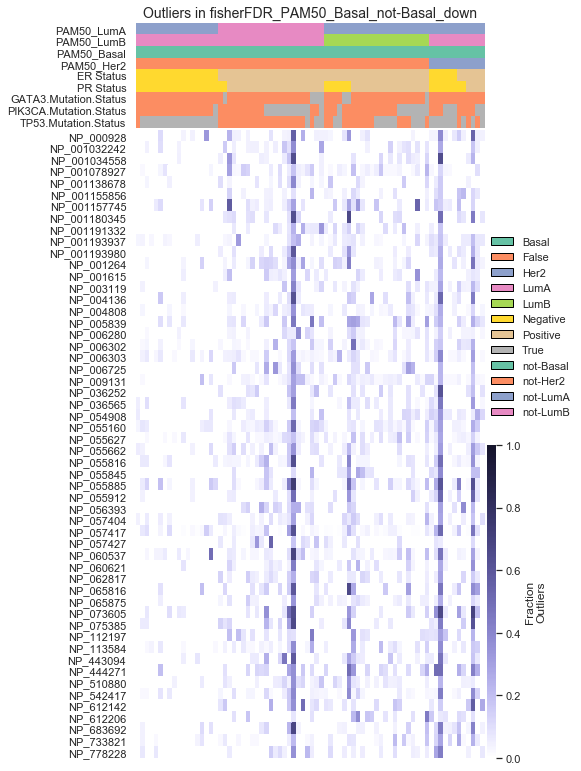

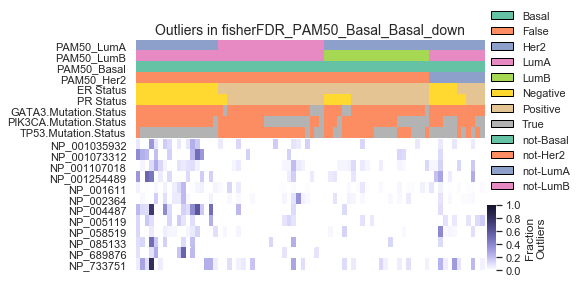

08/06/2019 14:49:27:WARNING:No significant genes at FDR 0.01 in fisherFDR_PAM50_Her2_not-Her2_down


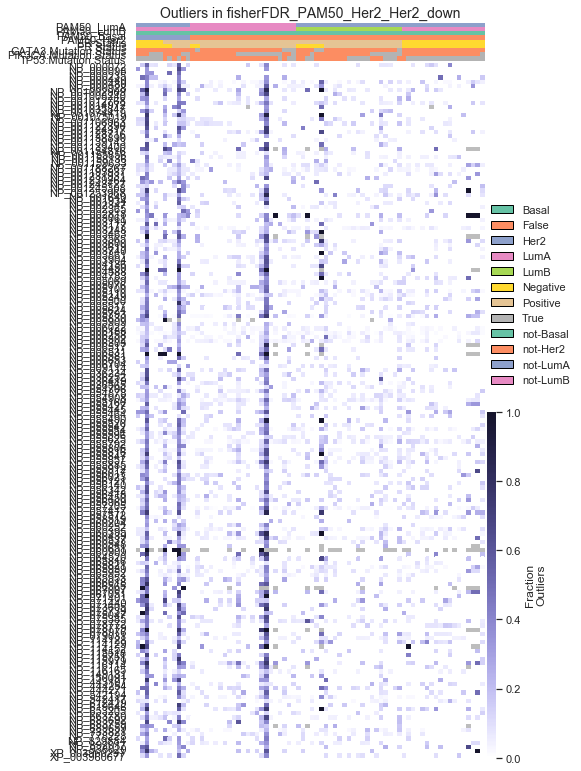

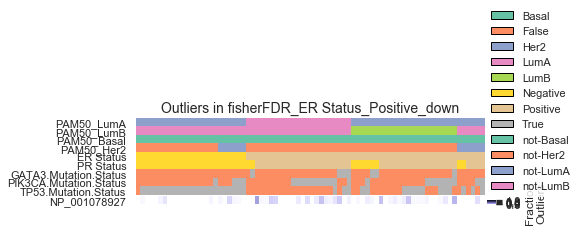

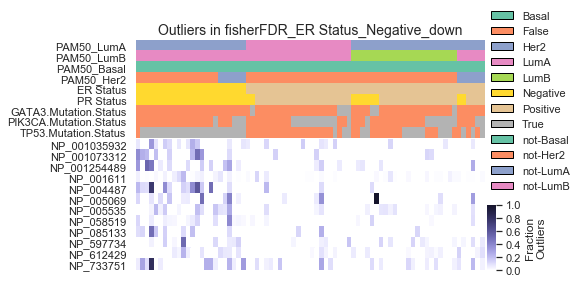

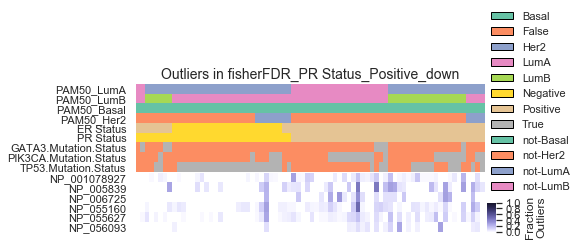

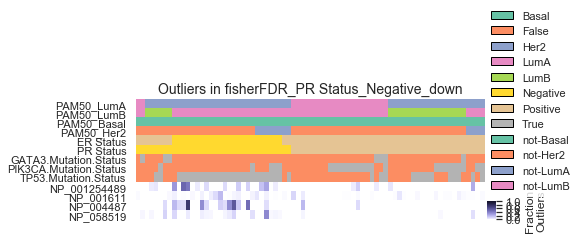

08/06/2019 14:49:34:WARNING:No significant genes at FDR 0.01 in fisherFDR_GATA3.Mutation.Status_False_down


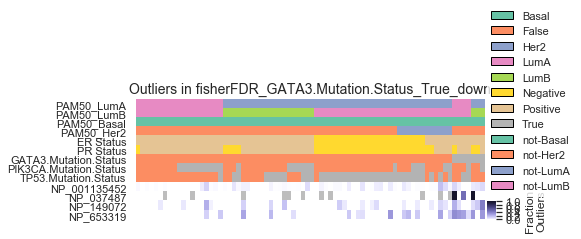

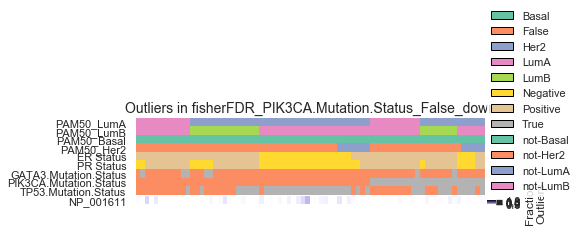

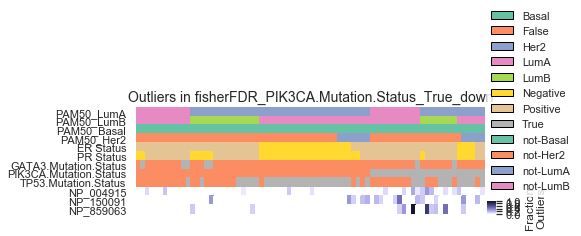

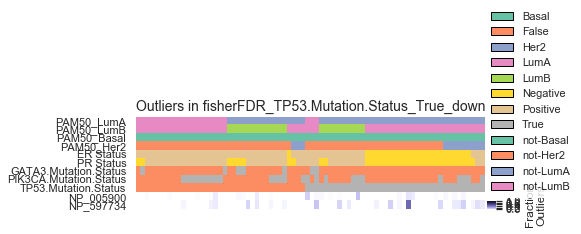

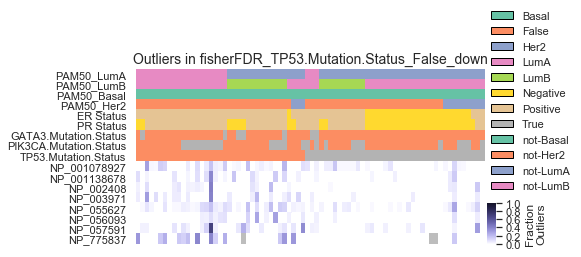

In [15]:
for col in qvalues.columns:
    if "_up" in col:
        redblue = "red"
        vistable = results['up'][0].frac_table
    elif "_down" in col:
        redblue = "blue"
        vistable = results['down'][0].frac_table
    
    blsh.plot_heatmap(annotations, qvalues, col_of_interest=col, vis_table=vistable, 
                      fdr=0.01, red_or_blue=redblue, output_prefix="output/brca", savefig=True)
    plt.show()
    plt.close()

# Performing the same comparisons using rank-sum test on raw values

In [17]:
rank_sums = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = blsh.comparisons.get_sample_lists(annotations, comp)
    
    pvals = values.apply((lambda row: scipy.stats.ranksums(row[group0list], row[group1list])[1]), axis=1)
    qvals = blsh.comparisons._multi_hyp_correct(pvals)
    rank_sums['%s_pval'%(comp)] = pvals
    rank_sums['%s_qval'%(comp)] = qvals
    rank_sums['%s_%s_minus_%s_diff_means'%(comp, group0, group1)] = values.apply((lambda row: row[group0list].mean() - row[group1list].mean()), axis=1)
    

In [82]:
rank_sums_qs = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = blsh.comparisons.get_sample_lists(annotations, comp)
    
    rank_sums_qs['%s_%s'%(comp, group0)] = (rank_sums['%s_qval'%(comp)]*(rank_sums['%s_%s_minus_%s_diff_means'%(comp, group0, group1)] / rank_sums['%s_%s_minus_%s_diff_means'%(comp, group0, group1)].abs()))
    

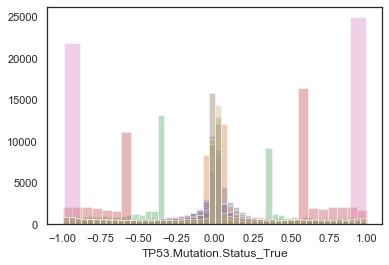

In [83]:
for col in rank_sums_qs.columns:
    sns.distplot(rank_sums_qs[col].dropna(), kde=False)

# Reformatting outliers qvalues to match rank sums

In [46]:
enrichments = sorted(list(set([col.rsplit('_', 1)[0] for col in qvalues.columns])))

In [60]:
comps = sorted(list(set([comp.rsplit('_', 1)[0] for comp in enrichments])))

In [61]:
comps

['fisherFDR_ER Status',
 'fisherFDR_GATA3.Mutation.Status',
 'fisherFDR_PAM50_Basal',
 'fisherFDR_PAM50_Her2',
 'fisherFDR_PAM50_LumA',
 'fisherFDR_PAM50_LumB',
 'fisherFDR_PIK3CA.Mutation.Status',
 'fisherFDR_PR Status',
 'fisherFDR_TP53.Mutation.Status']

In [ ]:
qvalues[[col+'_down' for col in enrichments]] = -qvalues[[col+'_down' for col in enrichments]]

In [78]:
signed_qvalues = pd.DataFrame()
for comp in comps:
    temp = qvalues[[col for col in qvalues.columns if comp in col]]
    for updown in directions:
        temp2 = temp[[col for col in temp.columns if '_%s'%updown in col]]
        signed_qvalues['%s'%(temp2.columns[0])] = temp2[temp2.columns[0]].subtract(temp2[temp2.columns[1]], fill_value=0, axis=0)

In [84]:
rank_sums_qs.head()

,PAM50_LumA_not-LumA,PAM50_LumB_not-LumB,PAM50_Basal_not-Basal,PAM50_Her2_not-Her2,ER Status_Positive,PR Status_Positive,GATA3.Mutation.Status_False,PIK3CA.Mutation.Status_False,TP53.Mutation.Status_True
index,,,,,,,,,
NP_001611-S1007s,-0.201998,-0.890003,0.355763,0.870870,0.263717,0.540697,-0.981106,-0.313396,-0.669053
NP_001611-S1010s,-0.073738,0.798550,0.350216,-0.791205,0.037199,0.240476,-0.981106,-0.354009,-0.322206
NP_001611-S1023s,-0.129254,0.039951,0.447262,-0.728310,-0.079911,0.016062,0.981106,-0.009250,-0.777229
NP_001611-S1042s,-0.070715,0.851386,0.452436,0.612152,0.208034,0.448558,-0.981106,0.253249,-0.147375
NP_001611-S1068s,-0.136540,0.864550,0.355763,-0.721395,0.044838,0.328627,-0.981106,-0.380890,-0.144539


In [86]:
signed_qvalues.head()

,fisherFDR_ER Status_Positive_up,fisherFDR_ER Status_Positive_down,fisherFDR_GATA3.Mutation.Status_False_up,fisherFDR_GATA3.Mutation.Status_False_down,fisherFDR_PAM50_Basal_not-Basal_up,fisherFDR_PAM50_Basal_not-Basal_down,fisherFDR_PAM50_Her2_not-Her2_up,fisherFDR_PAM50_Her2_not-Her2_down,fisherFDR_PAM50_LumA_not-LumA_up,fisherFDR_PAM50_LumA_not-LumA_down,fisherFDR_PAM50_LumB_not-LumB_up,fisherFDR_PAM50_LumB_not-LumB_down,fisherFDR_PIK3CA.Mutation.Status_False_up,fisherFDR_PIK3CA.Mutation.Status_False_down,fisherFDR_PR Status_Positive_up,fisherFDR_PR Status_Positive_down,fisherFDR_TP53.Mutation.Status_True_up,fisherFDR_TP53.Mutation.Status_True_down
NP_000043,NaN,NaN,NaN,NaN,NaN,NaN,-0.226428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP_000072,NaN,-0.092832,NaN,NaN,NaN,0.902453,NaN,-0.000031,NaN,0.555961,NaN,0.049009,NaN,NaN,NaN,-0.648814,NaN,0.030157
NP_000098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP_000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.241691,NaN,NaN,NaN,NaN,NaN,-0.331796,NaN,NaN,NaN,NaN
NP_000115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Performing the same comparisons on aggregated mean values using rank-sum test

# Finding genes enriched in both directions for the same comparison

In [31]:
enrichments = sorted(list(set([col.rsplit('_', 1)[0] for col in qvalues.columns])))

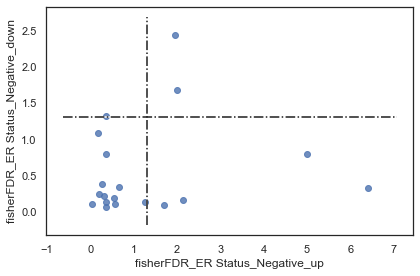

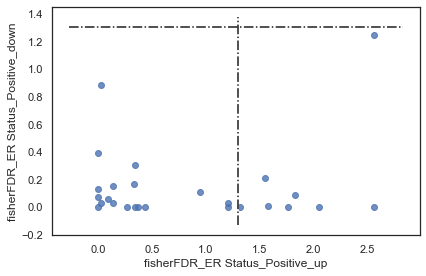

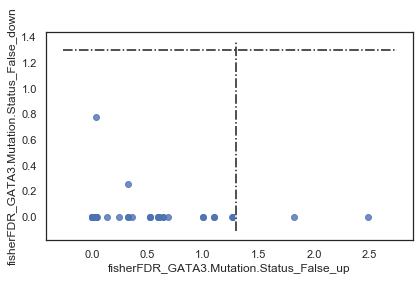

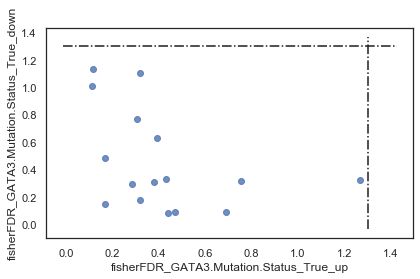

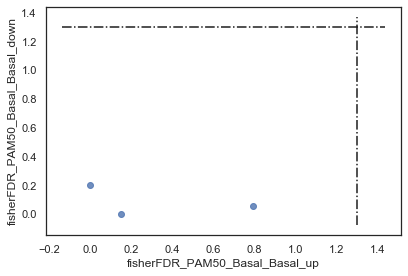

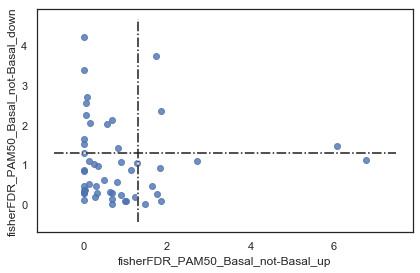

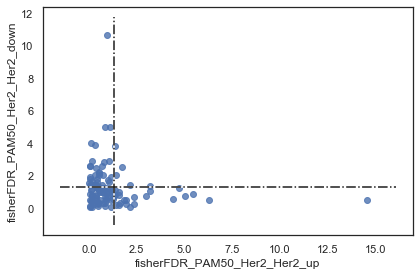

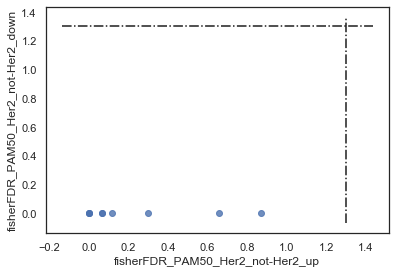

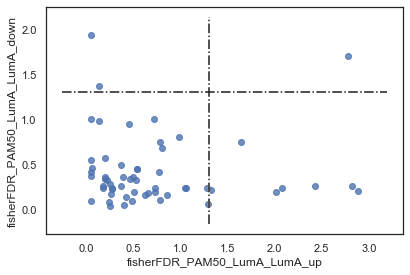

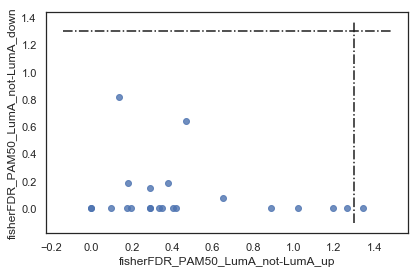

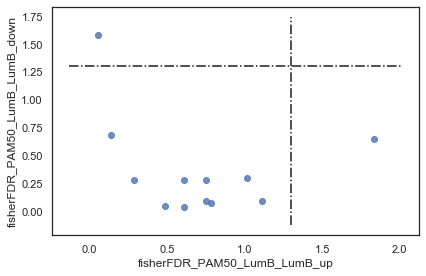

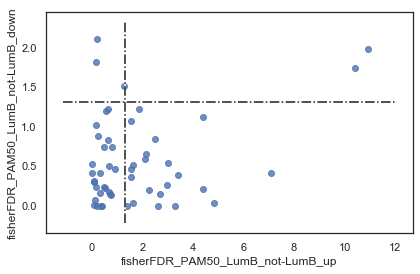

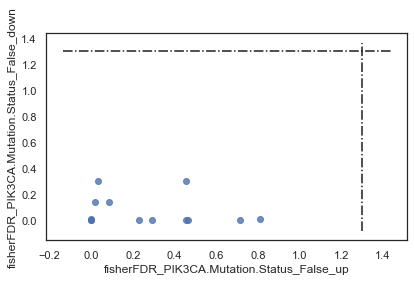

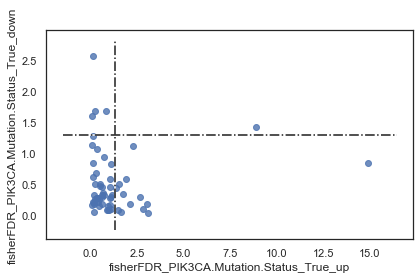

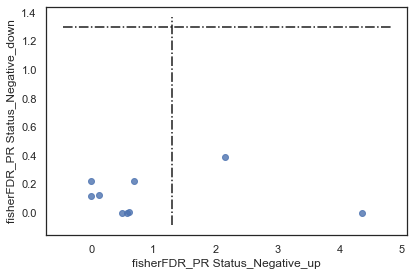

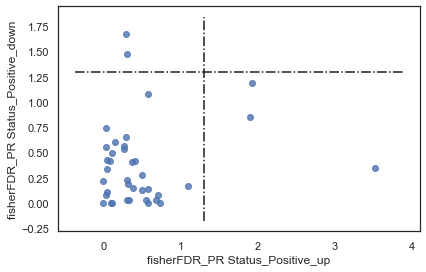

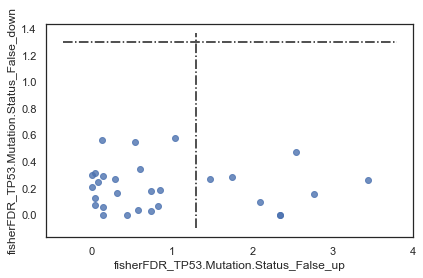

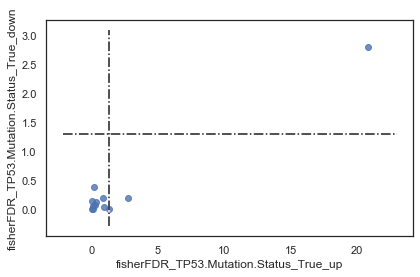

In [44]:
for comp in enrichments:
    ax = sns.regplot(x=-np.log10(qvalues[comp+'_up']), y=-np.log10(qvalues[comp+'_down']), fit_reg=False)
    
    plt.tight_layout()
    plt.plot([-np.log10(0.05), -np.log10(0.05)],ax.get_ylim(), 'white')
    plt.plot(ax.get_xlim(),[-np.log10(0.05), -np.log10(0.05)], 'white')
    plt.plot([-np.log10(0.05), -np.log10(0.05)],ax.get_ylim(), 'k-.')
    plt.plot(ax.get_xlim(),[-np.log10(0.05), -np.log10(0.05)], 'k-.')
    plt.savefig('figures/scatter_upanddown_%s.pdf'%(comp.split('_', 1)[1]), dpi=200)
    
    plt.show()
    plt.close()

In [32]:
fdr = 0.05
enriched_up_and_down = pd.DataFrame()
for comp in enrichments:
    qvalues[comp+'_up'] <

['fisherFDR_ER Status_Negative',
 'fisherFDR_ER Status_Positive',
 'fisherFDR_GATA3.Mutation.Status_False',
 'fisherFDR_GATA3.Mutation.Status_True',
 'fisherFDR_PAM50_Basal_Basal',
 'fisherFDR_PAM50_Basal_not-Basal',
 'fisherFDR_PAM50_Her2_Her2',
 'fisherFDR_PAM50_Her2_not-Her2',
 'fisherFDR_PAM50_LumA_LumA',
 'fisherFDR_PAM50_LumA_not-LumA',
 'fisherFDR_PAM50_LumB_LumB',
 'fisherFDR_PAM50_LumB_not-LumB',
 'fisherFDR_PIK3CA.Mutation.Status_False',
 'fisherFDR_PIK3CA.Mutation.Status_True',
 'fisherFDR_PR Status_Negative',
 'fisherFDR_PR Status_Positive',
 'fisherFDR_TP53.Mutation.Status_False',
 'fisherFDR_TP53.Mutation.Status_True']